<a href="https://colab.research.google.com/github/humpyreddy96/ClusterAnalysis/blob/main/scGAMClusterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##scGAM Cluster Analysis


This analysis aims to find the best 'k' value number of clusters for the given dataset, in this case the input is a distance matrix(481x481) between various nuclear profiles.


###**Pipeline**
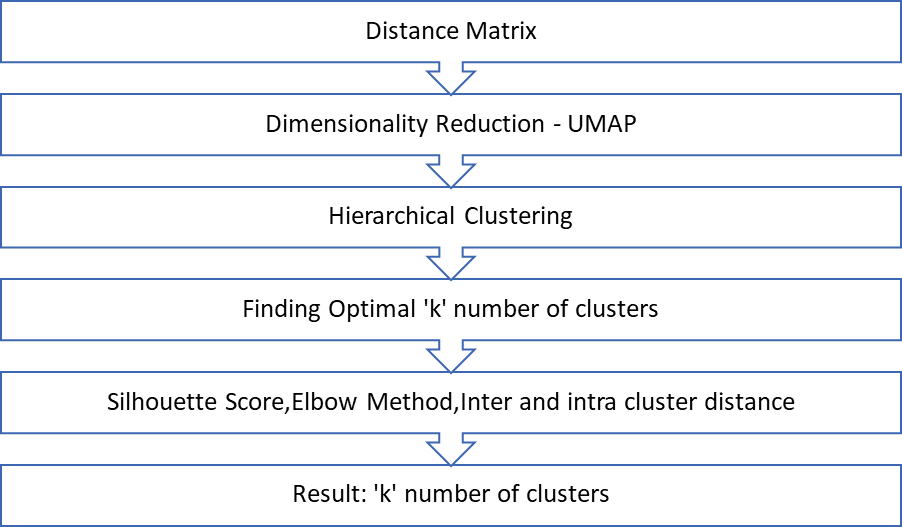

Importing Libraries

In [ ]:
pip install umap-learn


In [ ]:
import pandas as pd
import numpy as np
from google.colab import data_table
data_table.enable_dataframe_formatter()

import umap.umap_ as umap

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_samples, silhouette_score


**Data Preprocessing**


Input: Distance Matrix

In [ ]:
df = pd.read_csv('46Cdist.csv')
columns = df.columns.tolist()
batch_labels = []

for i in range(1,len(columns)):
  columns[i] = columns[i].split('1np_')[1].split('.')[0]
columns[0] = 'NP'
df.columns = columns
for i in range(0,481):
  batch_labels.append(int(df.columns[1:][i][1]))

df.head(3)
str = df[df.columns[0]][0].split('1np_')[1].split('.')[0]
df['NP'].values
for i in range(len(df)):
    df['NP'].values[i] = df['NP'].values[i].split('1np_')[1].split('.')[0]


In [ ]:
batch_labels = []
labels = []
for i in range(0,333):
  batch_labels.append(int(df.columns[1:][i][1]+df.columns[1:][i][2]))
  labels.append(df.columns[1:][i][1]+df.columns[1:][i][2])

for i in range(333,481):
  batch_labels.append(int(df.columns[1:][i][1])) 
  labels.append(df.columns[1:][i][1])

labels = set(labels)
labels =[ 'f' + e for e in labels]
labels

['f6',
 'f12',
 'f3',
 'f10',
 'f16',
 'f17',
 'f18',
 'f8',
 'f9',
 'f14',
 'f7',
 'f11',
 'f5',
 'f15',
 'f13']

In [ ]:
df = df.drop('NP', axis=1)


Dimensionality Reduction using UMAP

In [ ]:
reducer = umap.UMAP(n_components=9,min_dist=0.4,n_neighbors=12,metric='precomputed')
embedding = reducer.fit_transform(df)
embedding.shape


/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(481, 9)

**Hierarchical Clustering** **& Computing Silhouette scores**

**Silhouette Score:** The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [ ]:
scores_list = []
for k in range(2,10):
  z = linkage(embedding, 'average')
  cluster_labels = cut_tree(z, n_clusters=[k]).flatten()
  score = silhouette_score(embedding,cluster_labels)
  scores_list.append(score)
  colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
  print("The silhouette score for k=",k ,"is",score)


The silhouette score for k= 2 is 0.23194975
The silhouette score for k= 3 is 0.10885468
The silhouette score for k= 4 is 0.07596898
The silhouette score for k= 5 is 0.04635481
The silhouette score for k= 6 is 0.09153475
The silhouette score for k= 7 is 0.0792601
The silhouette score for k= 8 is 0.0638292
The silhouette score for k= 9 is 0.08365779


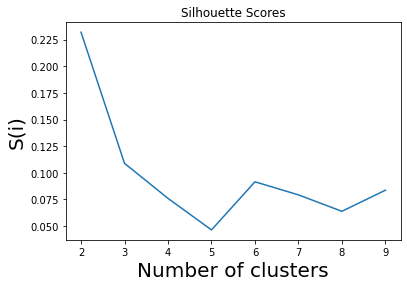

In [ ]:
# Plotting a bar graph to compare the results
k=[2,3,4,5,6,7,8,9]
plt.plot(k, scores_list)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.title("Silhouette Scores")
plt.show()

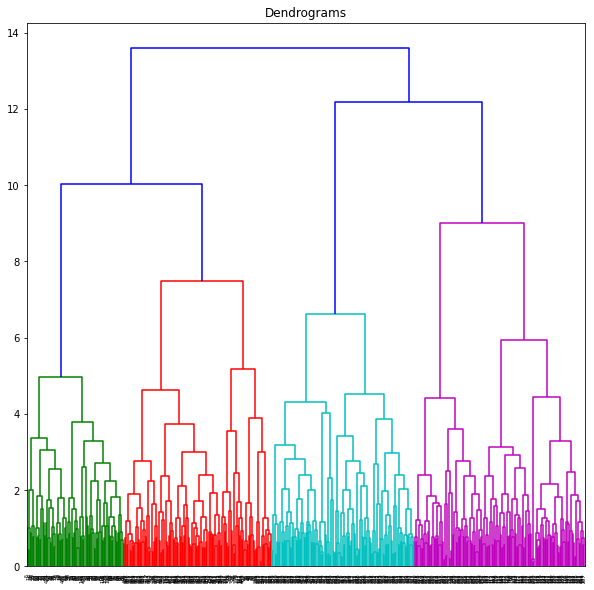

In [ ]:
z = linkage(embedding, 'ward')
cluster_labels = cut_tree(z, n_clusters=[2]).flatten()
plt.figure(figsize=(10,10 ))  
plt.title("Dendrograms")  
dend = shc.dendrogram(z)

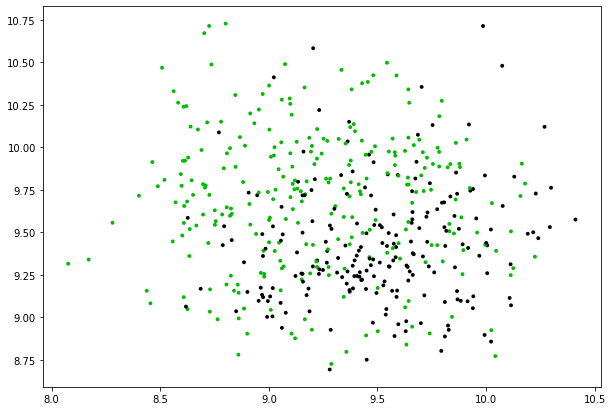

In [ ]:
colors = cm.nipy_spectral(cluster_labels.astype(float) / 2)
plt.figure(figsize=[10,7])
plt.scatter(embedding[:, 0], embedding[:, 1], marker=".", s=60, lw=0, c=colors)

In [ ]:
def get_batch_effect(batch_number):
  count_1 = 0
  count_0 = 0
  for i in range(481):
      if batch_labels[i]==batch_number:
        if cluster_labels[i]==0:
          count_0 = count_0 + 1
        else:
          count_1 = count_1 + 1
  return (count_0,count_1)

In [ ]:
get_batch_effect(12)

In [ ]:
cluster_0= []
cluster_1= []
batches = set(batch_labels)
for i in batches:
  cluster_0.append(get_batch_effect(i)[0])
  cluster_1.append(get_batch_effect(i)[1])
cluster_1 = [i for i in cluster_1 if i != 0]
cluster_1


## Batch Effect
Visualization of which batches appear in cluster 1 and in cluster 2

Text(0.5, 1.0, 'Cluster 2')

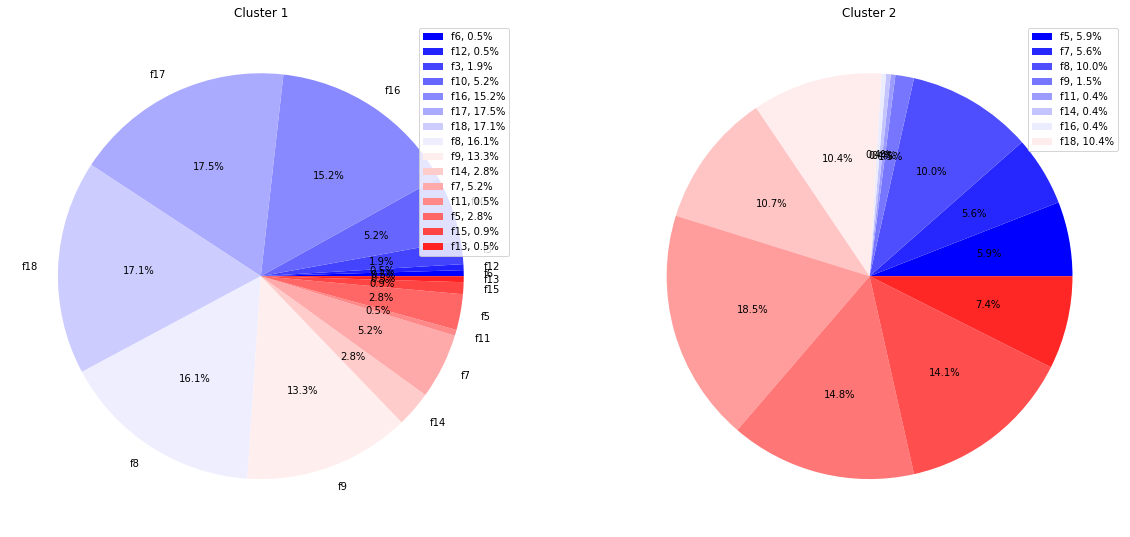

In [ ]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20),sharey=True)
theme = plt.get_cmap('bwr')
#Cluster 1
ax1.set_prop_cycle("color",[theme(1. * i / len(cluster_0)) for i in range(len(cluster_0))])
ax1.pie(cluster_0, autopct='%1.1f%%',labels=labels)
ax1.legend( loc='upper right' ,  labels=['%s, %1.1f%%' % (l, (float(s) / sum(cluster_0)) * 100) for l, s in zip(labels, cluster_0)])
ax1.set_title('Cluster 1')

labels = ['f5','f7','f8','f9','f11','f14','f16','f18']
theme = plt.get_cmap('bwr')
ax2.set_prop_cycle("color",[theme(1. * i / len(cluster_1)) for i in range(len(cluster_1))])
ax2.pie(cluster_1, autopct='%1.1f%%')
ax2.legend( loc='upper right',  labels=['%s, %1.1f%%' % (l, (float(s) / sum(cluster_1)) * 100) for l, s in zip(labels, cluster_1)],)
ax2.set_title('Cluster 2')
